# 453_Meitong Chen_Assignment1

## Data Preparation

### 1. Select data subset for modeling

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LassoCV


In [2]:
#load the data 
data = pd.read_csv("C:/Users/win/Desktop/Churn_Modelling.csv")
# overview of the data
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# remove useless columns: rownumber, customerid, surname
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# check again
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Explanation:**

I deleted the rownumber, customerid and surname columns, use remain data as selected data subset. Because I will not use the rownumber, customerid and Surname for my later analysis. And use data.head to show few rows of data to check.

###  2. Clean dataset and apply transformations

In [4]:
# columns' names
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [5]:
# structure and data types of the data
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB
None


In [6]:
# calculate how many missing value for each column
missing_values = data.isnull().sum()
missing_values

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# chech the types of each column, so that i can decide which column to tranform
data_types = data.dtypes
data_types

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
# the geography and gender are object type, tranform them into integer
label_geo = LabelEncoder()
label_gen = LabelEncoder()


data['Geography'] = label_geo.fit_transform(data['Geography'].astype(str))
data['Gender'] = label_gen.fit_transform(data['Gender'].astype(str))

# double check
new_data_types = data.dtypes
new_data_types



CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# create a mapping of encoded values back to original categories for geography
geo = dict(zip(label_geo.classes_, label_geo.transform(label_geo.classes_)))

# create a mapping of encoded values back to original categories for gender
gen = dict(zip(label_gen.classes_, label_gen.transform(label_gen.classes_)))

# tables
geo_table = pd.DataFrame(list(geo.items()), columns=['Geography', 'Encoded_Value'])
gen_table = pd.DataFrame(list(gen.items()), columns=['Gender', 'Encoded_Value'])

display(geo_table)
display(gen_table)



,Geography,Encoded_Value
0,France,0
1,Germany,1
2,Spain,2


,Gender,Encoded_Value
0,Female,0
1,Male,1


In [11]:
# use minmax method to scale data
scaler = MinMaxScaler()

# scale balance and estimated salary
data_clean = scaler.fit_transform(data[['Balance', 'EstimatedSalary']])
new_balance_estsalary = pd.DataFrame(data_clean, columns=['Balance_Scaled', 'EstimatedSalary_Scaled'])
new_balance_estsalary

# replace
data['Balance'] = new_balance_estsalary['Balance_Scaled']
data['EstimatedSalary'] = new_balance_estsalary['EstimatedSalary_Scaled']

# check
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.000000,1,1,1,0.506735,1
1,608,2,0,41,1,0.334031,1,0,1,0.562709,0
2,502,0,0,42,8,0.636357,3,1,0,0.569654,1
3,699,0,0,39,1,0.000000,2,0,0,0.469120,0
4,850,2,0,43,2,0.500246,1,1,1,0.395400,0


**Explanation:**

I checked the number of missing value for each column, and there was no missing value, so do not need to deal with them. Then I checked the data type for each column, tranform the Geography and Gender from object to integer. Also, formed the tables showed which integer value corresponds to each category for the Geography and Gender columns after label encoding. Finally, used minmax method to scale Balance and EstimatedSalary. These scaled values now lie within the range of 0 to 1, making them suitable for use in algorithms that are sensitive to the scale of data. 

###  3. Perform feature engineering & feature selection

In [12]:
# summary statistics for the dataset
summary_stats = data.describe()
print(summary_stats)

        CreditScore     Geography        Gender           Age        Tenure  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean     650.528800      0.746300      0.545700     38.921800      5.012800   
std       96.653299      0.827529      0.497932     10.487806      2.892174   
min      350.000000      0.000000      0.000000     18.000000      0.000000   
25%      584.000000      0.000000      0.000000     32.000000      3.000000   
50%      652.000000      0.000000      1.000000     37.000000      5.000000   
75%      718.000000      1.000000      1.000000     44.000000      7.000000   
max      850.000000      2.000000      1.000000     92.000000     10.000000   

            Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count  10000.000000   10000.000000  10000.00000    10000.000000   
mean       0.304848       1.530200      0.70550        0.515100   
std        0.248696       0.581654      0.45584        0.499797   
min        0.000000 

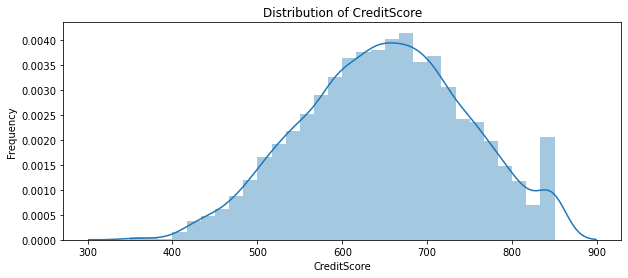

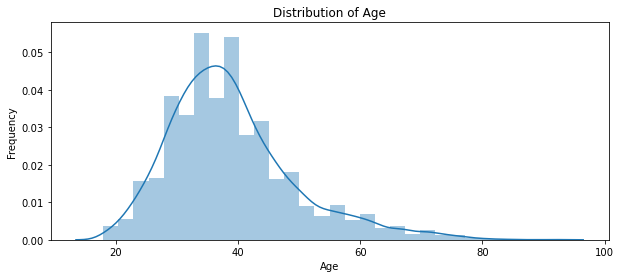

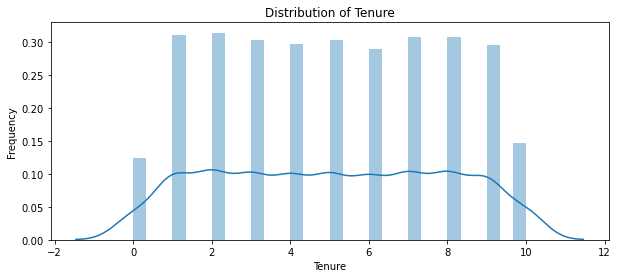

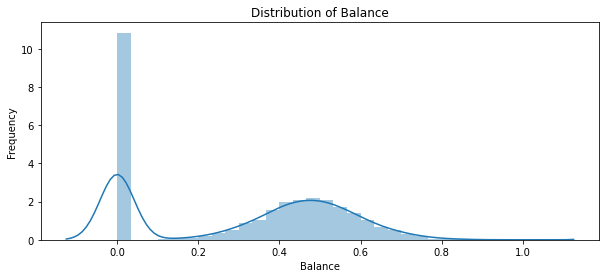

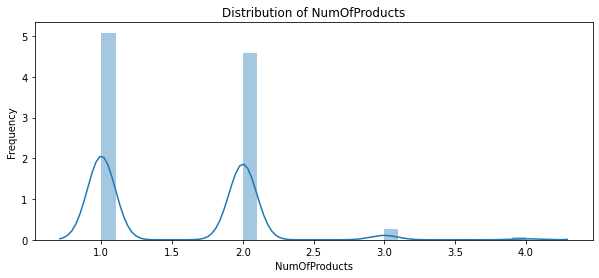

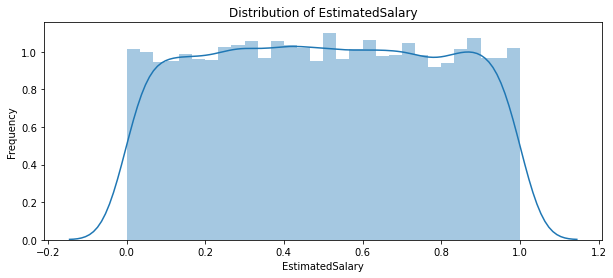

In [13]:
# Visual analysis for numeric features
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# hist
for feature in numeric_features:
    plt.figure(figsize=(10, 4))
    sns.distplot(data[feature].dropna(), bins=30, kde=True)  # `dropna()` to remove missing values
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


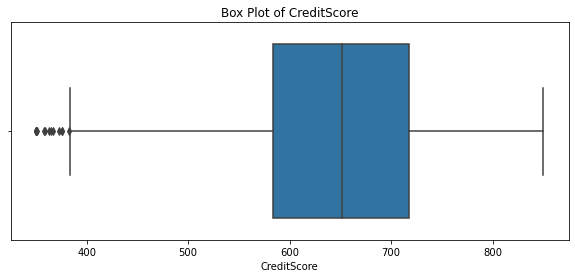

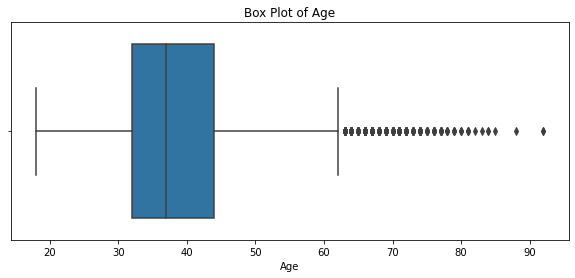

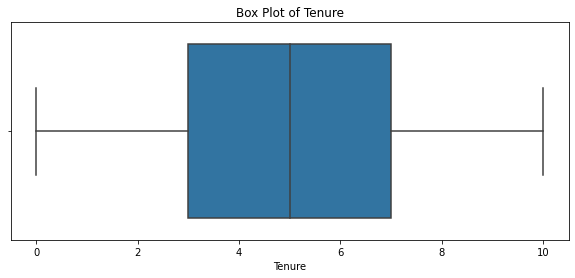

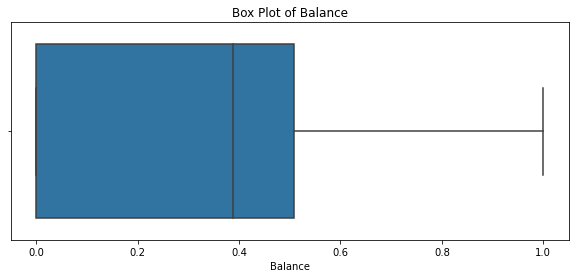

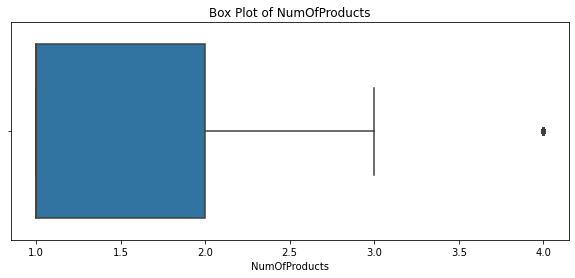

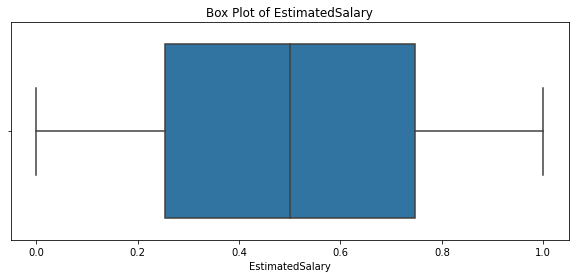

In [14]:
# boxplot
for feature in numeric_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()


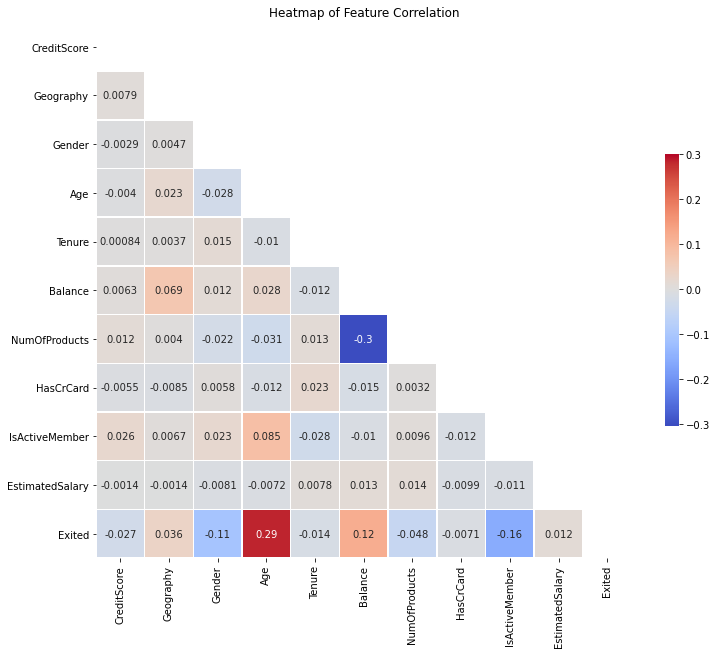

In [15]:
# correlations
corr = data.corr()

# heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Heatmap of Feature Correlation')
plt.show()


**Explanation:**

**Histograms:**

(1) Credit Score:
The distribution of the credit score seems to be fairly normal with a slight left skew. There is a small spike at the higher end of the scale, around a score of 850.

(2) Age:
The age distribution is roughly normal but with a right skew, means a younger customer base with fewer older customers.

(3) Tenure:
Tenure appears to be fairly uniformly distributed. This suggests that customers are spread across different lengths of relationship with the bank.

(4) Balance:
There is a peak at 0, which might indicate a large number of customers with no balance in their account. The rest of the balance distribution has a slight right skew.

(5) NumOfProducts:
Most customers seem to have 1 or 2 products with the bank. There's a very small number of customers with 3 or 4 products.

(6) EstimatedSalary:
The salary distribution looks quite uniform across the range, which is unexpected as salary distributions typically have a right skew.


**Box Plots:**

(1) Credit Score:
There are outliers on the lower end of the credit score, which means some customers with significantly lower scores than the rest.

(2) Age:
There are outliers on the upper end, which means older customers that are fewer in numbers compared to the younger demographic.

(3) Tenure:
There are no visible outliers in tenure, which means that customers’ lengths of association with the bank don't have extreme variations.

(4) Balance:
There is no obvious presence of outliers in the balance, but the box plot suggests a wide range of balances among customers, with a median around 0.3-0.4 after scaling.

(5) NumOfProducts:
There are a few outliers in the number of products, specifically for customers holding more than 2 products.

(6) EstimatedSalary:
The estimated salary shows no outliers and has a median that is centrally located, reaffirming the uniform distribution observed in the histogram.

**Heatmap:**

(1) Exited vs Age/IsActiveMember: There is a moderately positive correlation between Age and the target variable Exited, indicating that as age increases, the likelihood of a customer exiting increases too. A moderate negative correlation between IsActiveMember and Exited, suggesting that active members are less likely to exit.

(2) Exited vs Credit Score: CreditScore seems to have a very weak negative correlation with Exited, indicating that it may not be a strong predictor for customer churn on its own.

(3) Exited vs Balance/Products: Balance has a very weak positive correlation with Exited. NumOfProducts has a negative correlation with Exited.

(4) Exited vs Geography/Gender: Both Geography and Gender have very weak correlations with Exited.

(5) Exited v Salary/HasCrCard: EstimatedSalary shows very little to no correlation with Exited, indicating that salary might not be a decisive factor in customer churn. Similarly, HasCrCard also shows a very weak correlation, suggesting whether a customer has a credit card or not doesn't strongly affect their decision to exit.

(6) Inter-feature Correlations: There are no strong correlations between any of the independent variables, which is good from a multicollinearity perspective. It means that each feature provides unique information and there isn't much redundant data.

In [16]:
# Define the x and y
x = data.drop('Exited', axis=1)
y = data['Exited']

# split the data into trainset and testset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# use LassoCV model to find the best alpha and coefficients
lasso = LassoCV(cv=5, random_state=42).fit(x_train, y_train)

# select features with non-zero coefficients
selected_features = x.columns[(lasso.coef_ != 0)]

# drop the column which not in the selected features
x_train_selected = x_train[selected_features]
x_test_selected = x_test[selected_features]

x_train_selected

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember
9254,686,0,1,32,6,0.000000,2,1
1561,632,1,1,42,4,0.476786,2,1
1670,559,2,1,24,3,0.457317,1,0
6087,561,0,0,27,9,0.540606,1,0
6669,517,0,1,56,9,0.566554,1,0
...,...,...,...,...,...,...,...,...
5734,768,0,1,54,8,0.277853,1,1
5191,682,0,0,58,1,0.000000,1,1
5390,735,0,0,38,1,0.000000,3,0
860,667,0,1,43,8,0.758186,1,0


**Explanation:**

I did the feature selection by fitting a Lasso model with cross-validation to the training data. Lasso is a regression analysis method that performs both variable selection and regularization to improve the prediction accuracy and interpretability of the statistical model it produces. Lasso regression is a type of linear regression that adds a regularization penalty to the loss function. The LassoCV function will fit multiple Lasso models on different subsets of the data (train data = 0.8*original data, test data = 0.2*oringinal data), each time with a different value alpha. For each alpha, it computes the cross-validated mean square error (MSE) by averaging the MSEs obtained from each fold. After all models are fit and the MSE for each alpha is calculated, LassoCV selects the alpha that has the smallest cross-validated MSE. 

## Modeling

### 1. Select modeling algorithms and techniques


**Explanation:**

**Selected models:**

Logistic Regression: Logistic regression is a linear model that is easy to implement and interpret. It gives you the probability of the target variable being in a certain class, which is useful for business decisions.

Support Vector Machine: it can be very effective in high-dimensional spaces, which can be the case if feature engineering leads to a large number of input variables. It can model non-linear boundaries using kernel tricks. ZAlso, it tends to be robust against overfitting, especially in high-dimensional space.

Random Forest: It can capture non-linear relationships without needing a transformation of variables, which can be an advantage if relationships between features and target are complex. It combines predictions from multiple decision trees, reducing the risk of overfitting compared to a single decision tree.

**Reasons for choose these 3 models:**

(1) Diversity: This selection of models covers a range of approaches: logistic regression is a simple linear model, SVM can provide a more complex non-linear decision boundary, and random forest is an ensemble model that doesn't assume linearity at all.

(2) Complexity: Logistic regression is the least intense computing, whereas SVM can be quite intense with larger datasets or more features, and Random Forests are somewhere in between, but can handle large datasets efficiently.

(3) Predictive power: While logistic regression may not be able to capture complex relationships, both SVMs and random forests are likely to provide more accurate predictions if such complex relationships exist.

### 2. Apply algorithms and techniques for building models

### Logistic regression model

In [17]:
# give logistic regression with a balancing mechanism for class distribution and a high iteration limit
model_log = LogisticRegression(random_state=2024, class_weight="balanced", max_iter=3000000)
model_log.fit(x_train_selected, y_train)

# use the selected trained data to predict the classification on the testing set
y_pred_log = model_log.predict(x_test_selected)
y_pred_log

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score


# the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # regularization parameter
    'penalty': ['l1', 'l2'],  # norms 
    'solver': ['liblinear']  # 'liblinear' works well with 'l1' and 'l2'
}

# Set up the GridSearchCV object
grid_search = GridSearchCV(estimator=model_log, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV
grid_search.fit(x_train_selected, y_train)

# Get the best estimator
best_logistic_model = grid_search.best_estimator_

# Predict on the testing data using the best found parameters
y_pred = best_logistic_model.predict(x_test_selected)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)
print("Best Model Parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Model Accuracy: 0.7045
Best Model Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.79      1607
           1       0.37      0.68      0.48       393

    accuracy                           0.70      2000
   macro avg       0.63      0.70      0.64      2000
weighted avg       0.80      0.70      0.73      2000



[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.5s finished


In [19]:
from sklearn.linear_model import LogisticRegression

# use best hyperparameters from GridSearchCV
best_params = {
    'C': 1,
    'penalty': 'l2',
    'solver': 'liblinear'
}

# initialize the Logistic Regression model with the best parameters
model_log_best = LogisticRegression(**best_params, random_state=2024)

# predict
model_log_best.fit(x_train_selected, y_train)
y_pred_log_best = model_log_best.predict(x_test_selected)
y_pred_log_best


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### SVM Model

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# initial model
svm_model = SVC(probability=True, random_state=2024)

# fit the model to the training data
svm_model.fit(x_train_selected, y_train)

# prediction
y_pred_svm = svm_model.predict(x_test_selected)
y_pred_svm

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
from sklearn.model_selection import GridSearchCV

# define the parameter grid for SVM
param_grid_svm = {
    'C': [1, 10],  # two options for C
    'kernel': ['rbf', 'linear'], # 2 types for kernel
    # removed gamma and restricting kernel to reduce combinations, because I can't run the results with the power of my computer
}

# initialize
grid_search_svm = GridSearchCV(SVC(probability=True, random_state=2024), param_grid_svm, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# fit gridsearchcv into the training data
grid_search_svm.fit(x_train_selected, y_train)

# get the best estimator
best_svm_model = grid_search_svm.best_estimator_
print("Best parameters found for SVM:")
print(grid_search_svm.best_params_)



Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:  3.5min remaining:   41.9s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  3.7min finished


Best parameters found for SVM:
{'C': 1, 'kernel': 'linear'}


In [41]:
# prediction on the test dataset, svm model
y_pred_best_svm = best_svm_model.predict(x_test_selected)
y_pred_best_svm

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

### Random Forest Model

In [32]:
from sklearn.ensemble import RandomForestClassifier

# initialize
rf_model = RandomForestClassifier(random_state=42)

# fit the model on the training data
rf_model.fit(x_train_selected, y_train)

# predict
y_pred_rf = rf_model.predict(x_test_selected)
y_pred_rf

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [34]:
from sklearn.model_selection import GridSearchCV

# define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 300],  # number of trees in the forest
    'max_depth': [10, 20],  # max depth of the tree
    'min_samples_split': [2, 10],  # min number of samples required to split an internal node
    'min_samples_leaf': [1, 4]  # min number of samples required to be at a leaf node
}

# initialize the gridsearchcv for rf
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', verbose=1)

# fit it to the training data
grid_search_rf.fit(x_train_selected, y_train)

# best model for rf
best_rf_model = grid_search_rf.best_estimator_
print("Best parameters found for Random Forest:")
print(grid_search_rf.best_params_)



Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.6min finished


Best parameters found for Random Forest:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


In [36]:
# predict on the test data using the best parameters
y_pred_best_rf = best_rf_model.predict(x_test_selected)
y_pred_best_rf

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

### 3. Assess performance of models 
### (interpret performance from business impact viewpoint  in model evaluation part 1)

### Logistic regression model

In [20]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_log_best).ravel()

# calculate precision and recall
precision = tp / (tp + fp)
recall = tp / (tp + fn)

print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"True Negatives: {tn}")
print(f"False Negatives: {fn}\n")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


True Positives: 71
False Positives: 46
True Negatives: 1561
False Negatives: 322

Precision: 0.6068376068376068
Recall: 0.1806615776081425


In [21]:
import pandas as pd
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_log_best)

# reordering the confusion matrix to match the provided layout
cm_reorder = cm[[1, 0], :]  # reorder the rows
cm_reorder = cm_reorder[:, [1, 0]]  # reorder the columns

# table
conf_matrix_df = pd.DataFrame(
    cm_reorder, 
    index=['Actual Positive', 'Actual Negative'],
    columns=['Predicted Positive', 'Predicted Negative']
)

print(conf_matrix_df)


                 Predicted Positive  Predicted Negative
Actual Positive                  71                 322
Actual Negative                  46                1561


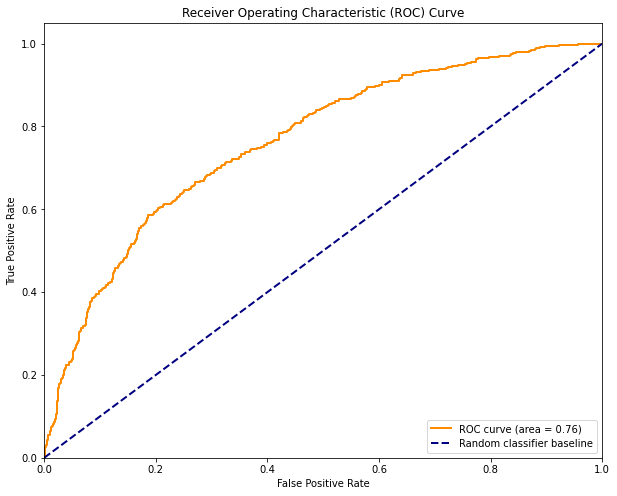

The ROC AUC score is: 0.76


In [22]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# assuming y_test are the true labels and y_probs are the predicted probabilities for the positive class
# predict probabilities for the positive outcome only
y_probs = model_log_best.predict_proba(x_test_selected)[:, 1]

# ROC AUC
roc_auc = roc_auc_score(y_test, y_probs)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# plot
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier baseline')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"The ROC AUC score is: {roc_auc:.2f}")


### SVM

In [28]:
# the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_best_svm).ravel()

# calculate precision and recall
precision = tp / (tp + fp)
recall = tp / (tp + fn)

print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"True Negatives: {tn}")
print(f"False Negatives: {fn}\n")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


True Positives: 65
False Positives: 35
True Negatives: 1572
False Negatives: 328

Precision: 0.65
Recall: 0.16539440203562342


In [29]:
cm = confusion_matrix(y_test, y_pred_best_svm)

# reordering the confusion matrix to match the provided layout
cm_reorder = cm[[1, 0], :]  # reorder the rows
cm_reorder = cm_reorder[:, [1, 0]]  # reorder the columns

# table
conf_matrix_df = pd.DataFrame(
    cm_reorder, 
    index=['Actual Positive', 'Actual Negative'],
    columns=['Predicted Positive', 'Predicted Negative']
)

print(conf_matrix_df)


                 Predicted Positive  Predicted Negative
Actual Positive                  65                 328
Actual Negative                  35                1572


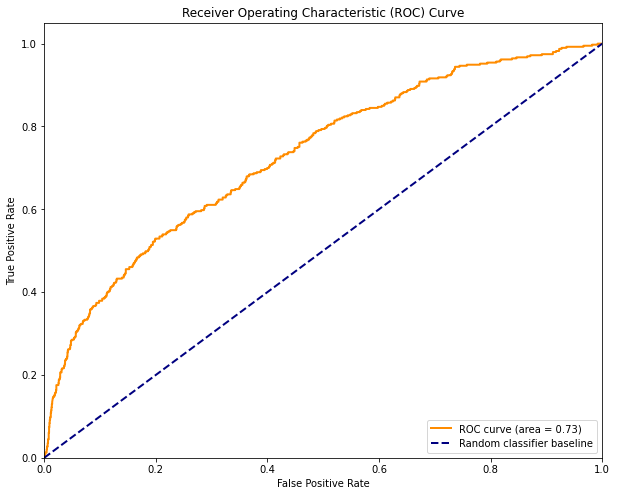

The ROC AUC score is: 0.73


In [30]:
# assuming y_test are the true labels and y_probs are the predicted probabilities for the positive class
# predict probabilities for the positive outcome only
y_probs = best_svm_model.predict_proba(x_test_selected)[:, 1]

# ROC AUC
roc_auc = roc_auc_score(y_test, y_probs)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# plot
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier baseline')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"The ROC AUC score is: {roc_auc:.2f}")


### Random Forest

In [37]:
# the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_best_rf).ravel()

# calculate precision and recall
precision = tp / (tp + fp)
recall = tp / (tp + fn)

print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"True Negatives: {tn}")
print(f"False Negatives: {fn}\n")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


True Positives: 181
False Positives: 50
True Negatives: 1557
False Negatives: 212

Precision: 0.7835497835497836
Recall: 0.46055979643765904


In [38]:
cm = confusion_matrix(y_test, y_pred_best_rf)

# reordering the confusion matrix to match the provided layout
cm_reorder = cm[[1, 0], :]  # reorder the rows
cm_reorder = cm_reorder[:, [1, 0]]  # reorder the columns

# table
conf_matrix_df = pd.DataFrame(
    cm_reorder, 
    index=['Actual Positive', 'Actual Negative'],
    columns=['Predicted Positive', 'Predicted Negative']
)

print(conf_matrix_df)


                 Predicted Positive  Predicted Negative
Actual Positive                 181                 212
Actual Negative                  50                1557


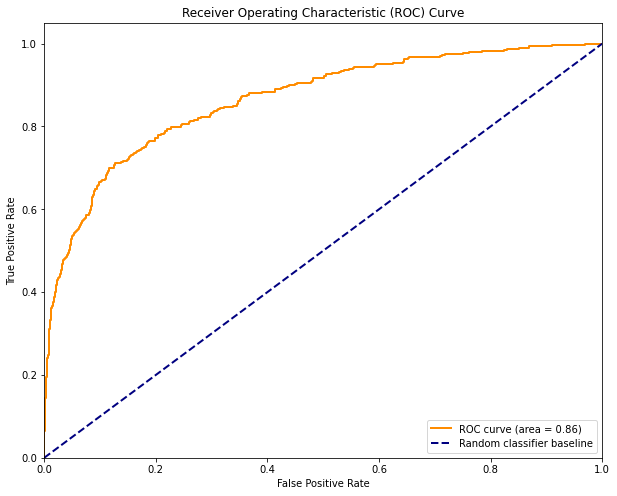

The ROC AUC score is: 0.86


In [39]:
# assuming y_test are the true labels and y_probs are the predicted probabilities for the positive class
# predict probabilities for the positive outcome only
y_probs = best_rf_model.predict_proba(x_test_selected)[:, 1]

# ROC AUC
roc_auc = roc_auc_score(y_test, y_probs)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# plot
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier baseline')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"The ROC AUC score is: {roc_auc:.2f}")


## Model Evaluation

### 1. Evaluate the model against business criteria
###  interpret performance from business impact viewpoint (false negatives vs false positives)

**For logistic regression model:**

True Positives (TP): 71
False Positives (FP): 46
True Negatives (TN): 1561
False Negatives (FN): 322
Precision: Approximately 0.61
Recall: Approximately 0.18
ROC AUC: Approximately 0.76

False Negatives (FN): These are customers that the model predicted would not churn, but they actually did. Every false negative represents a lost opportunity for the business to intervene and potentially retain the customer. This can have a significant impact, as the cost of acquiring a new customer is generally much higher than retaining an existing one. With 322 false negatives, the model is missing out on many customers who are at risk of churning. For a business, this might translate into lost revenue and increased marketing expenses to attract new customers.

False Positives (FP): These are customers that the model predicted would churn, but they actually did not. False positives lead to unnecessary spending on retention efforts, such as discounts, promotional offers, or personalized attention that might not have been needed. While these costs can add up, they are usually less severe than the cost of losing a customer. In this case, with 46 false positives, the business might be wasting resources on customers who would stay regardless of intervention.

Precision: The model has a precision of about 0.61, which means that when the model predicts that a customer will churn, it is correct around 61% of the time. In practical terms, this implies that approximately 39% of the retention efforts, such as special offers or targeted communications, might be allocated to customers who would not have churned anyway.

Recall (Sensitivity): With a recall of about 0.18, the model identifies only 18% of all actual churn cases. This is a critical insight, as it implies that 82% of customers who will churn are being missed by the model. For the business, improving recall could be much more valuable than precision if the cost of losing a customer is high.

ROC AUC: The ROC AUC score is 0.76, which is considered a fair performance for a predictive model. It indicates that the model is reasonably good at distinguishing between customers who will churn and those who will not. A higher AUC provides confidence in the model's ranking ability — it's likely to assign a higher probability of churning to a randomly chosen actual churner than to a randomly chosen non-churner.



**For SVM model:**

True Positives: 65
False Positives: 35
True Negatives: 1572
False Negatives: 328
Precision: 0.65
Recall: 0.16539440203562342

False Negatives (FN): Each false negative represents a customer who churns without the business's knowledge, leading to a loss of revenue and potentially damaging long-term relationships.The high number of false negatives suggests the SVM model is missing many opportunities to intervene with customers who are at risk of leaving. The business could lose out on the lifetime value these customers would bring if retained.For strategic, this indicates the need for the business to improve the model's sensitivity to churn signals or possibly to invest in additional data or features that could enhance predictive accuracy.

False Positives (FP): while less costly than false negatives, represent a misallocation of resources. The business might be spending on retention strategies, like offers or improved service, for customers who are not at risk of churning. The relatively lower number of false positives suggests the SVM model is cautious about predicting churn, leading to more conservative retention efforts. However, it is at the cost of missing many actual churn cases.

Precision: This indicates that when the SVM model predicts a customer will churn, it is correct 65% of the time. In a business context, this means that roughly two-thirds of the retention budget is effectively spent on customers who are indeed at risk of churning.

Recall: The low recall rate is a significant concern. It means that the model is only identifying about 16.5% of the actual churn cases. For a business, this could indicate that while the retention efforts are somewhat efficiently spent, they are not widespread enough to capture the majority of customers who are likely to churn.

ROC AUC: means that the SVM model has a fair ability to differentiate between the churners and non-churners. It's a moderate score and indicates that there's room for improvement in the model's performance.

**For Random Forest:**

True Positives: 181
False Positives: 50
True Negatives: 1557
False Negatives: 212
Precision: 0.7835497835497836
Recall: 0.46055979643765904

False Positives (FP): 50 customers that the model predicted would churn, but they didn’t. Business resources devoted to these customers might be considered inefficiently used. However, this could also result in improved customer satisfaction and loyalty due to the additional attention and offers, which isn't necessarily negative.

False Negatives (FN): 212 customers were likely to churn but were not flagged by the model. This is a critical area for business as it represents a direct loss of revenue and the potential cost of acquiring new customers, which is usually higher than retaining existing ones. Minimizing FNs may be a strategic key.

Precision: 0.78 of positive identifications that were actually correct. A precision of 0.78 is relatively high, suggesting that the retention strategies will be well-targeted and likely to yield a good return on investment.

Recall: A recall of 0.46 means the model identified less than half of all actual churn cases. This suggests a risk of missed opportunities for customer retention. Businesses may need to investigate why these customers were not identified and consider strategies for increasing the recall rate without causing a significant increase in false positives.

ROC AUC: An AUC of 0.86 indicates good model performance. However, even with a good AUC, the recall rate means that the model's current threshold might be too careful, and the business may benefit from adjusting it to correctly flag more actual churners.

### 2. Test the model, if possible, in the real application

In [23]:
from sklearn.metrics import r2_score

# out of sample R square of logistic model
r_squared_log = r2_score(y_test, y_pred_log_best)

print(f"The out-of-sample R-squared is: {r_squared_log:.4f}")


The out-of-sample R-squared is: -0.1654


In [31]:
# out of sample R square of svm model
r_squared_svm = r2_score(y_test, y_pred_best_svm)

print(f"The out-of-sample R-squared is: {r_squared_svm:.4f}")


The out-of-sample R-squared is: -0.1496


In [40]:
# out of sample R square of random forest model
r_squared_rf = r2_score(y_test, y_pred_best_rf)

print(f"The out-of-sample R-squared is: {r_squared_rf:.4f}")


The out-of-sample R-squared is: 0.1703


Because there is no real data, I splitted the data into train dataset (0.8*orginal data) and test dataset (0.2*orginal data). And use the test set as real data to see the accuracy of the model, use out of sample R squre to compare among models. The OOS R square of random forest is largest (0.1703), which means approximately 17.03% of the variance in the dependent variable (churn) is predictable from the independent variables (the features used in the model).